
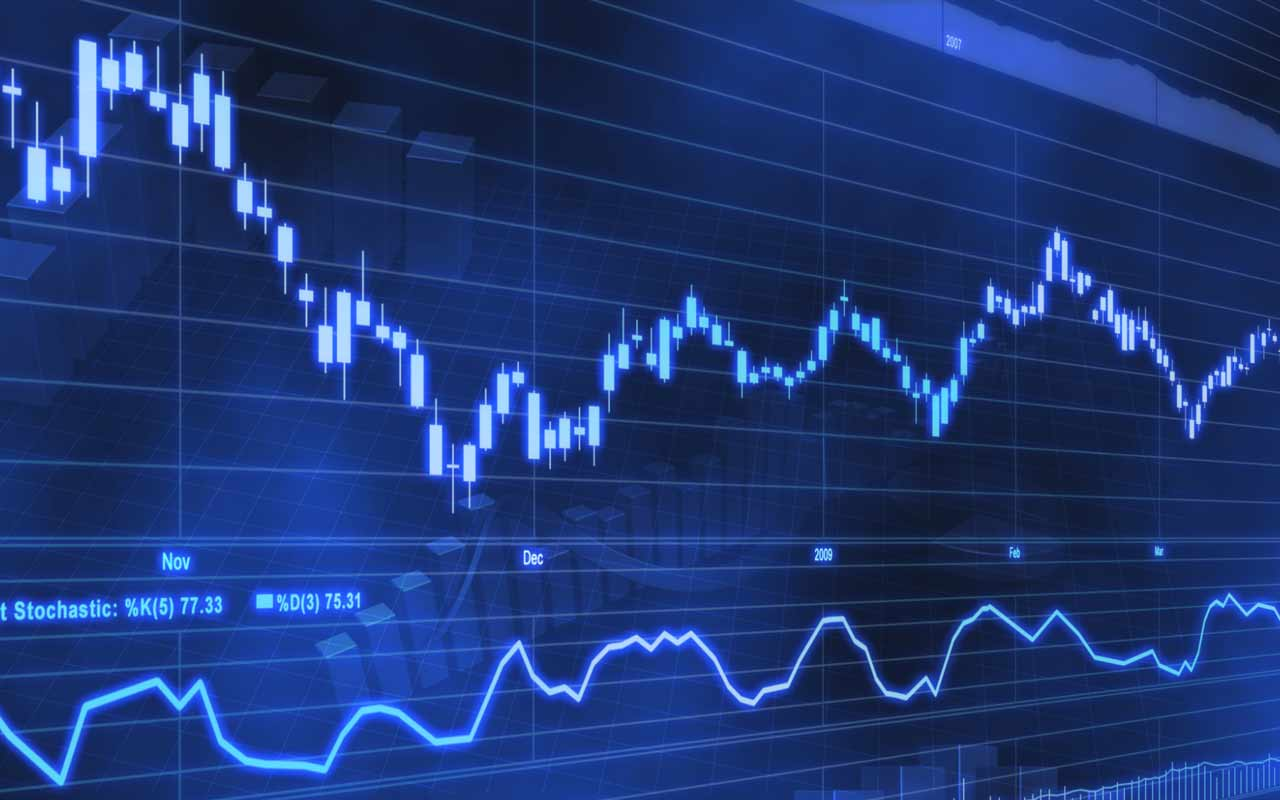
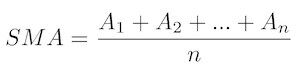
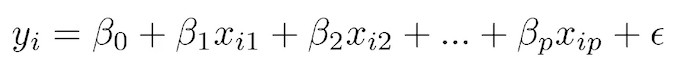

In [1]:
# Load External Style Sheet
from IPython.display import HTML
HTML('<style>{}</style>'.format(open('style.css').read()))

<strong style="color:red">Disclaimer: This document is best viewed within Jupyter Lab, Jupyter Notebooks, or Jupyter Notebook Viewer. Styles and anchor links are not always properly rendered when viewed on Github.</strong>  
Click the link below to view document with <strong>Jupyter Notebook Viewer</strong> or copy and paste the following URL into your browsers address bar:  
https://nbviewer.jupyter.org/github/andrewthorson/Crypto_Asset_Predictive_Modeling/blob/master/Cryptoasset_Moving_Average.ipynb

# <div class="title_outer_div"><span class="title_inner_div"><h1>Predictive Modeling of Cryptoasset Price Movement: Moving Average Model</h1></span></div>

**03/29/2019**  
Andrew Thorson

## Table of Contents
1. [**Overview**](#Overview)  
4. [**Methodology**](#Methodology)
    1. [Analytic Approach](#Analytic-Approach)
    2. [Data Requirements](#Data-Requirements)
    3. [Data Collection](#Data-Collection)
    4. [Data Understanding](#Data-Understanding)
    5. [Data Preparation](#Data-Preparation)
    6. [Modeling](#Modeling)
5. [**Results**](#Results)
7. [**Conclusion**](#Conclusion)
8. [**References**](#References)

## Overview
The goal of this project is the production of a model that is capable of accurately predicting a cryptoassets market price movement. This prediction will be generated using a particular time-series market data set and a particular time-series blockchain data set. Feature selection will be constrained to only the attributes provided in the data sets, and to features which can be generated from them. In turn, models and their algorithms will be impacted by the same constraints.

## Methodology

### Analytic Approach

The analytic approach best suited for generating a model capable of predicting cryptoasset market price movement is the predictive analytic approach. The accuracy of the model is likely to be limited by the overwhelmingly high number variables that impact the growth of a cryptoasset and its relative value. Wharton Research Scholars published "An Analysis of the Crytocurrency Industry" in 2015. Author Ryan Farell indicates that at least two of the main factors are largely unquantifiable in terms of impact:
1. International government regulatory attempts. <sup>[1](#r1)</sup>
2. Ambivalent public perception in moving towards it's wider adoption. <sup>[1](#r1)</sup>

Given the demonstrably apparent unpredictability of cryptocurrency exchange rates at any particular time, there will be some measurable error in the models predictions but this error should be minimized. In order to produce a model approaching optimal accuracy, multiple models will be produced using machine learning techniques and subsequently evaluated for accuracy. This process is done in separate notebooks, where each notebook is dedicated to one technique or model. This notebook examines the usefulness of the moving average technique in predicting cryptoasset price movements.

### Data Requirements

#### Data Provided by Digital Assets Data
Mr. Steve A. Collins, Vice President of Data Science for Digital Assets Data, provided a ZIP file titled "Tech_Eval.zip". Three files were contained in the ZIP file: two csv data files and one docx Microsoft Word file.
- **Market Data**: market_data.csv
- **Blockchain Data**: blockchain_data.csv
- **Data Dictionary**: data_dictionary.docx

Learn more about Digital Assets Data by visiting their website: https://www.digitalassetsdata.com/

### Data Collection

#### 1. Import Packages/Libraries

In [2]:
# import packages for data collection
import pandas as pd # library providing data structures and data analysis tools - https://pandas.pydata.org/
import numpy as np

#### 2. Load Data

##### 2.1 Load Market Data
Generate and load a DataFrame with market data from market_data.csv

In [3]:
market_data = pd.read_csv('Tech_Eval/market_data.csv') # construct dataframe from csv file
market_data.name = "Market Data" # name dataframe
print("{}\nRows: {}\nColumns: {}".format(market_data.name, market_data.shape[0], market_data.shape[1])) # verify shape of dataframe
market_data.sample(5) # sample contents of dataframe

Market Data
Rows: 4563
Columns: 17


,base_asset_id,quote_asset_id,epoch_ts,price_open,price_high,price_low,price_close,price_mean_a,price_std,price_vwap_a,price_vwap_h,cnt_total,volume_total,volume_high,volume_low,volume_mean_a,volume_std
324,Litecoin_LTC_LTC,USDollar_USD_USD,2019-01-21 00:00:00+00,30.976464,31.711959,30.330000,31.246464,31.030039,0.183597,31.051432,31.050068,58464,4.118836e+05,2929.753000,1.000000e-08,8.360951,33.757860
1740,Ethereum_ETH_ETH,USDollar_USD_USD,2018-09-14 00:00:00+00,207.508807,224.790000,118.228371,206.088158,209.670730,5.006610,209.547917,209.420665,664133,2.459130e+06,2904.593894,1.000000e-08,4.402301,16.842941
3430,Bitcoin_BTC_BTC,USDollar_USD_USD,2018-04-13 00:00:00+00,7744.179515,8240.000000,3809.175728,7745.806269,7853.783747,124.981463,7856.430867,7854.474177,763602,1.602624e+05,325.667789,4.000000e-10,0.263053,1.184720
3765,Litecoin_LTC_LTC,USDollar_USD_USD,2018-03-14 00:00:00+00,169.148005,178.298321,102.693739,159.560212,163.245586,4.322915,162.869648,162.752446,278880,1.166107e+06,3091.543660,1.000000e-08,5.264255,16.307779
236,Litecoin_LTC_LTC,USDollar_USD_USD,2019-01-29 00:00:00+00,31.185993,31.840000,16.375034,30.869767,30.909718,0.297911,30.913481,30.909817,69243,4.988438e+05,1771.062880,1.000000e-08,7.808097,25.956429


#### 2.2 Load Blockchain Data
Generate and load a DataFrame with blockchain data from blockchain_data.csv

In [4]:
blockchain_data = pd.read_csv('Tech_Eval/blockchain_data.csv') # construct dataframe from csv file
blockchain_data.name = "Blockchain Data" # name dataframe
print("{}\nRows: {}\nColumns: {}".format(blockchain_data.name, blockchain_data.shape[0], blockchain_data.shape[1])) # verify shape of dataframe
blockchain_data.sample(5) # verify contents of dataframe

Blockchain Data
Rows: 2075
Columns: 23


,asset_id,epoch_ts,volume_sum,volume_high,volume_low,volume_mean_q,volume_mean_a,volume_mean_g,volume_mean_h,volume_std,...,fee_high,fee_low,fee_mean_q,fee_mean_a,fee_mean_g,fee_mean_h,fee_std,block_reward_sum,supply_total,blockchain_size
1045,Bitcoin_BTC_BTC,2018-07-25 00:00:00+00,9.969840e+05,8854.302206,0.000000,60.239166,3.984621,0.071410,1.432004e-03,60.107357,...,0.100000,0.0,0.000783,0.000107,0.000026,0.000014,0.000775,2212.500000,1.717101e+07,172432318465
577,Ethereum_ETH_ETH,2018-10-27 00:00:00+00,1.015608e+06,32131.000000,0.000000,87.141132,2.006941,0.145978,9.187090e-15,87.118104,...,0.160001,0.0,0.013045,0.004226,0.001672,0.001088,0.012341,20379.843750,3.118410e+07,62091758006
1244,Zcash_ZEC_ZEC,2018-06-16 00:00:00+00,4.641438e+05,6474.241946,0.000000,453.786920,52.421937,0.860003,7.339911e-03,450.774289,...,0.033828,0.0,0.000988,0.000308,0.000165,0.000043,0.000938,7137.500000,4.153838e+06,15076044801
1301,Dash_DASH_DASH,2018-06-04 00:00:00+00,1.667104e+05,4578.876098,0.000009,113.470558,12.827822,0.247588,1.425971e-02,112.747473,...,0.074530,0.0,0.001539,0.000200,0.000006,0.000003,0.001526,1833.387808,7.833913e+06,5209481675
985,Bitcoin_BTC_BTC,2018-08-06 00:00:00+00,1.259506e+06,13376.436329,0.000000,82.276569,5.761509,0.073674,1.945167e-03,82.074781,...,0.087400,0.0,0.000544,0.000081,0.000020,0.000011,0.000538,1637.500000,1.719431e+07,173618865929


### Data Understanding

#### 1. Market Data: Exchange Market Trading Data Aggregated Daily by Cryptoasset
Filename: market_data.csv

This data was received as a CSV file covering market data derived from exchange trades aggregated at the daily level by Cryptoasset for the period beginning January 1st, 2019 and ending February 19th, 2019.

##### 1.1 Set of Assets Included

- Bitcoin_BTC_BTC  
- Ethereum_ETH_ETH  
- Litecoin_LTC_LTC  
- Dash_DASH_DASH  
- Zcash_ZEC_ZEC  
- Cardano_ADA_ADA  
- EOS_EOS_EOS  
- NEO_NEO_NEO  
- Ripple_XRP_XRP  
- Stellar_XLM_XLM  
- TRON_TRX_TRX

##### 1.2 Data Dictionary

<div class="data_dictionary">
    <table>
      <tr>
        <th>Index</th>
        <th>Field</th>
        <th>Description</th>
      </tr>
      <tr>
        <td>1</td>
        <td>base_asset_id</td>
        <td>id for the given asset</td>
      </tr>
      <tr>
        <td>2</td>
        <td>quote_asset_id</td>
        <td>id for the asset that the base is quoted in (should all be US Dollars)</td>
      </tr>
      <tr>
        <td>3</td>
        <td>epoch_ts</td>
        <td>timestamp for the row (daily)</td>
      </tr>
      <tr>
        <td>4</td>
        <td>price_open</td>
        <td>opening price (USD)</td>
      </tr>
      <tr>
        <td>5</td>
        <td>price_high</td>
        <td>highest price (USD)</td>
      </tr>
      <tr>
        <td>6</td>
        <td>price_low</td>
        <td>lowest price (USD)</td>
      </tr>
      <tr>
        <td>7</td>
        <td>price_close</td>
        <td>closing price (USD)</td>
      </tr>
      <tr>
        <td>8</td>
        <td>price_mean_a</td>
        <td>arithmetic mean of price (USD)</td>
      </tr>
      <tr>
        <td>9</td>
        <td>price_std</td>
        <td>standard deviation of price (USD)</td>
      </tr>
      <tr>
        <td>10</td>
        <td>price_vwap_a</td>
        <td>arithmetic volume weighted average price</td>
      </tr>
      <tr>
        <td>11</td>
        <td>price_vwap_h</td>
        <td>harmonic volume weighted average price</td>
      </tr>
      <tr>
        <td>12</td>
        <td>cnt_total</td>
        <td>transaction count</td>
      </tr>
      <tr>
        <td>13</td>
        <td>volume_total</td>
        <td>total market transacted volume</td>
      </tr>
      <tr>
        <td>14</td>
        <td>volume_high</td>
        <td>volume of highest volume market transaction</td>
      </tr>
      <tr>
        <td>15</td>
        <td>volume_low</td>
        <td>volume of lowest volume market transaction</td>
      </tr>
      <tr>
        <td>16</td>
        <td>volume_mean_a</td>
        <td>arithmetic mean of market volume</td>
      </tr>
      <tr>
        <td>17</td>
        <td>volume_std</td>
        <td>standard deviation of market volume</td>
      </tr>
    </table>
</div>

#### 2. Blockchain Data: Blockchain Data Aggregated Daily by Cryptoasset
Filename: blockchain_data.csv

This data was received as a CSV file consisting of blockchain data for a subset of the assets in the market data file also aggregated at the daily level for the period beginning January 1st, 2018 and ending February 19th, 2019.

##### 2.1 Set of Assets Included

- Bitcoin_BTC_BTC  
- Ethereum_ETH_ETH  
- Litecoin_LTC_LTC  
- Dash_DASH_DASH  
- Zcash_ZEC_ZEC

##### 2.2 Data Dictionary

<div class="data_dictionary">
    <table>
      <tr>
        <th>Index</th>
        <th>Field</th>
        <th>Description</th>
      </tr>
      <tr>
        <td>1</td>
        <td>asset_id</td>
        <td>id for the given asset</td>
      </tr>
      <tr>
        <td>2</td>
        <td>epoch_ts</td>
        <td>timestamp for the row (daily)</td>
      </tr>
      <tr>
        <td>3</td>
        <td>volume_sum</td>
        <td>total transacted blockchain volume</td>
      </tr>
      <tr>
        <td>4</td>
        <td>volume_high</td>
        <td>volume of highest volume blockchain transaction</td>
      </tr>
      <tr>
        <td>5</td>
        <td>volume_low</td>
        <td>volume of lowest volume blockchain transaction</td>
      </tr>
      <tr>
        <td>6</td>
        <td>volume_mean_q</td>
        <td>quadratic mean of blockchain transaction volume</td>
      </tr>
      <tr>
        <td>7</td>
        <td>volume_mean_a</td>
        <td>arithmetic mean of blockchain transaction volume</td>
      </tr>
      <tr>
        <td>8</td>
        <td>volume_mean_g</td>
        <td>geometric mean of blockchain transaction volume</td>
      </tr>
      <tr>
        <td>9</td>
        <td>volume_mean_h</td>
        <td>harmonic mean of blockchain transaction volume</td>
      </tr>
      <tr>
        <td>10</td>
        <td>volume_std</td>
        <td>standard deviation of blockchain transaction volume</td>
      </tr>
      <tr>
        <td>11</td>
        <td>coinbase_volume</td>
        <td>total volume of the days coinbase transactions</td>
      </tr>
      <tr>
        <td>12</td>
        <td>txn_count</td>
        <td>blockchain transaction count</td>
      </tr>
      <tr>
        <td>13</td>
        <td>fee_sum</td>
        <td>total blockchain fee volume</td>
      </tr>
      <tr>
        <td>14</td>
        <td>fee_high</td>
        <td>volume of highest volume blockchain fee</td>
      </tr>
      <tr>
        <td>15</td>
        <td>fee_low</td>
        <td>volume of lowest volume blockchain fee</td>
      </tr>
      <tr>
        <td>16</td>
        <td>fee_mean_q</td>
        <td>quadratic mean of blockchain fee volume</td>
      </tr>
      <tr>
        <td>17</td>
        <td>fee_mean_a</td>
        <td>arithmetic mean of blockchain fee volume</td>
      </tr>
      <tr>
        <td>18</td>
        <td>fee_mean_g</td>
        <td>geometric mean of blockchain fee volume</td>
      </tr>
      <tr>
        <td>19</td>
        <td>fee_mean_h</td>
        <td>harmonic mean of blockchain fee volume</td>
      </tr>
      <tr>
        <td>20</td>
        <td>fee_std</td>
        <td>standard deviation of blockchain fee volume</td>
      </tr>
      <tr>
        <td>21</td>
        <td>block_reward_sum</td>
        <td>total block of issued block rewards</td>
      </tr>
      <tr>
        <td>22</td>
        <td>supply_total</td>
        <td>number of issued assets</td>
      </tr>
      <tr>
        <td>23</td>
        <td>blockchain_size</td>
        <td>size of the total blockchain (bytes)</td>
      </tr>
    </table>
</div>

### Data Preparation

#### 1. Import Packages/Libraries

In [5]:
# import packages for preprocessing
from sklearn import preprocessing # scikit-learn is a Python module for machine learning - https://scikit-learn.org/stable/

#### 2. Clean Market Data

##### 2.1 Ensure Proper Data Types

Ensure that each column has the proper data type.

In [6]:
# return pandas data types for each column
market_data.dtypes

base_asset_id      object
quote_asset_id     object
epoch_ts           object
price_open        float64
price_high        float64
price_low         float64
price_close       float64
price_mean_a      float64
price_std         float64
price_vwap_a      float64
price_vwap_h      float64
cnt_total           int64
volume_total      float64
volume_high       float64
volume_low        float64
volume_mean_a     float64
volume_std        float64
dtype: object

**market_data.epoch_ts**

market_data.epoch_ts is currently of the object data type. It should be of the datetime64 data type. Other columns appear to be of the proper data type.

In [7]:
market_data.epoch_ts = market_data.epoch_ts.astype('datetime64') # set data type of epoch_ts to datetime64
market_data.dtypes # verify data types

base_asset_id             object
quote_asset_id            object
epoch_ts          datetime64[ns]
price_open               float64
price_high               float64
price_low                float64
price_close              float64
price_mean_a             float64
price_std                float64
price_vwap_a             float64
price_vwap_h             float64
cnt_total                  int64
volume_total             float64
volume_high              float64
volume_low               float64
volume_mean_a            float64
volume_std               float64
dtype: object

##### 2.2 Reduce Redundancy

**market_data.base_asset_id**

The values for base_asset_id appear to be a bit redundant as they are in the following form: name_symbol_symbol
The same form is followed for asset_id in blockchain_data, so the current forms will easily match if these values are left alone and tables are merged later but a more concise value for market_data.base_asset_id & blockchain_data.asset_id might help for label readibility when it comes time for visualization. It may also reduce the processing load slightly. Before making any changes, we will ensure that all values for market_data.base_asset_id follow the form: name_symbol_symbol.

In [8]:
# return unique values
print("Unique market_data.base_asset_id Values:")
print("\n".join(market_data.base_asset_id.unique()))

Unique market_data.base_asset_id Values:
Bitcoin_BTC_BTC
Cardano_ADA_ADA
Dash_DASH_DASH
EOS_EOS_EOS
Ethereum_ETH_ETH
Litecoin_LTC_LTC
NEO_NEO_NEO
Ripple_XRP_XRP
Stellar_XLM_XLM
TRON_TRX_TRX
Zcash_ZEC_ZEC


**market_data.quote_asset_id**

As with market_data.base_asset_id, the values for market_data.quote_asset_id appear to be redundant. There is no matching column in blockchain_data so, reducing redundancy should not result in problems later on. Before making any changes, we will ensure that all values for market_data.quote_asset_id follow the form: name_symbol_symbol.

In [9]:
# return unique values
print("Unique market_data.quote_asset_id Values:")
print("\n".join(market_data.quote_asset_id.unique()))

Unique market_data.quote_asset_id Values:
USDollar_USD_USD


In [10]:
# reduce redundancy
market_data.base_asset_id = market_data.base_asset_id.str.extract(r'(.*)\_') # remove redundant repetition of base asset symbol
market_data.quote_asset_id = market_data.quote_asset_id.str.extract(r'(.*)\_') # remove redundant repetition of quote asset symbol

In [11]:
market_data.sample(10) # return sample of cleaned dataframe

,base_asset_id,quote_asset_id,epoch_ts,price_open,price_high,price_low,price_close,price_mean_a,price_std,price_vwap_a,price_vwap_h,cnt_total,volume_total,volume_high,volume_low,volume_mean_a,volume_std
2336,NEO_NEO,USDollar_USD,2018-07-22,33.866763,34.857886,18.949215,32.862297,33.643080,0.414322,33.643617,33.638570,70351,8.476570e+05,1.867841e+04,2.000000e-08,14.236965,67.979154
4122,Zcash_ZEC,USDollar_USD,2018-02-10,462.469013,509.470000,444.643342,474.385084,472.848378,10.972385,473.257355,473.017652,60550,5.586325e+04,5.000000e+02,1.000000e-06,1.301248,5.341064
3071,Ethereum_ETH,USDollar_USD,2018-05-16,689.956188,714.084494,371.219766,696.634847,684.720656,7.168867,684.165856,684.074567,509682,5.575035e+05,9.080900e+02,1.000000e-08,1.478372,6.436938
961,Ethereum_ETH,USDollar_USD,2018-11-24,119.365841,130.500000,67.752265,111.567649,117.054884,4.534192,117.067447,116.867633,466615,1.734013e+06,3.000000e+03,1.000000e-08,5.038893,18.217728
3759,Zcash_ZEC,USDollar_USD,2018-03-15,242.847092,253.230000,227.617372,235.960953,238.817594,4.100255,238.604870,238.518552,14291,1.982904e+04,1.718390e+02,1.000000e-06,1.537673,3.858062
2829,Ethereum_ETH,USDollar_USD,2018-06-07,597.176291,617.985808,332.419751,595.089773,596.959371,3.419241,596.518395,596.492892,282306,3.610704e+05,1.187674e+03,1.000000e-08,1.870022,8.592450
4345,Dash_DASH,USDollar_USD,2018-01-20,864.844247,958.543673,826.519309,896.578648,896.813210,21.059906,894.807807,894.330814,47891,3.489389e+04,1.000000e+02,1.000000e-08,0.869725,2.679779
1271,NEO_NEO,USDollar_USD,2018-10-27,16.161909,16.530000,9.745829,15.926371,16.061981,0.112964,16.058357,16.057555,28715,4.029872e+05,5.190120e+03,1.000000e-07,17.345094,53.533272
2830,Litecoin_LTC,USDollar_USD,2018-06-07,119.559270,123.970000,86.246297,119.648185,119.559331,0.768800,119.625759,119.619199,113448,4.331251e+05,3.234975e+03,1.000000e-08,4.789340,21.418750
2603,TRON_TRX,USDollar_USD,2018-06-28,0.037151,0.039825,0.035467,0.036016,0.036935,0.000530,0.036984,0.036976,80991,6.247245e+08,1.987523e+06,5.000000e-06,9369.787761,30546.188960


#### 3. Clean Blockchain Data

##### 3.1 Ensure Proper Data Types

Ensure that each column has the proper data type.

In [12]:
# return pandas data types for each column
blockchain_data.dtypes

asset_id             object
epoch_ts             object
volume_sum          float64
volume_high         float64
volume_low          float64
volume_mean_q       float64
volume_mean_a       float64
volume_mean_g       float64
volume_mean_h       float64
volume_std          float64
coinbase_volume     float64
txn_count             int64
fee_sum             float64
fee_high            float64
fee_low             float64
fee_mean_q          float64
fee_mean_a          float64
fee_mean_g          float64
fee_mean_h          float64
fee_std             float64
block_reward_sum    float64
supply_total        float64
blockchain_size       int64
dtype: object

**blockchain_data.epoch_ts**

blockchain_data.epoch_ts is currently of the object data type. It should be of the datetime64 data type. Other columns appear to be of the proper data type.

In [13]:
blockchain_data.epoch_ts = blockchain_data.epoch_ts.astype('datetime64') # set data type of epoch_ts to datetime64
blockchain_data.dtypes # verify data types

asset_id                    object
epoch_ts            datetime64[ns]
volume_sum                 float64
volume_high                float64
volume_low                 float64
volume_mean_q              float64
volume_mean_a              float64
volume_mean_g              float64
volume_mean_h              float64
volume_std                 float64
coinbase_volume            float64
txn_count                    int64
fee_sum                    float64
fee_high                   float64
fee_low                    float64
fee_mean_q                 float64
fee_mean_a                 float64
fee_mean_g                 float64
fee_mean_h                 float64
fee_std                    float64
block_reward_sum           float64
supply_total               float64
blockchain_size              int64
dtype: object

##### 3.2 Reduce Redundancy

**blockchain_data.asset_id**

As with market_data.base_asset_id and market_data.quote_asset_id, the values of blockchain_data.asset_id may benefit from reduced redundancy. Before making any changes, we will ensure that all values for blockchain_data.base_asset_id follow the form: name_symbol_symbol.

In [14]:
# return unique values
print("Unique blockchain_data.asset_id Values:")
print("\n".join(blockchain_data.asset_id.unique()))

Unique blockchain_data.asset_id Values:
Bitcoin_BTC_BTC
Dash_DASH_DASH
Ethereum_ETH_ETH
Litecoin_LTC_LTC
Zcash_ZEC_ZEC


In [15]:
# reduce redundancy
blockchain_data.asset_id = blockchain_data.asset_id.str.extract(r'(.*)\_') # remove redundant repetition of asset symbol

In [16]:
blockchain_data.sample(10) # return sample of cleaned dataframe

,asset_id,epoch_ts,volume_sum,volume_high,volume_low,volume_mean_q,volume_mean_a,volume_mean_g,volume_mean_h,volume_std,...,fee_high,fee_low,fee_mean_q,fee_mean_a,fee_mean_g,fee_mean_h,fee_std,block_reward_sum,supply_total,blockchain_size
2050,Bitcoin_BTC,2018-01-05,2.921231e+06,22006.004000,0.000000,125.678947,8.523989,0.248324,0.004790,125.389733,...,0.430234,0.0,0.008311,0.002047,0.001303,0.001126,0.008055,1787.500000,1.678440e+07,149690102616
1568,Litecoin_LTC,2018-04-12,6.757356e+06,38171.944271,0.000580,1830.988925,203.326584,3.293493,0.152235,1819.691836,...,0.117420,0.0,0.004708,0.001192,0.000441,0.000267,0.004555,15375.000000,5.606190e+07,12950619920
343,Litecoin_LTC,2018-12-13,2.809260e+06,103470.757983,0.000417,1534.755868,122.232068,3.161371,0.143924,1529.913964,...,0.188496,0.0,0.003780,0.000685,0.000172,0.000047,0.003717,15350.000000,5.957452e+07,17260151841
938,Litecoin_LTC,2018-08-16,2.942742e+06,86545.680021,0.000100,1346.854168,103.250469,2.293495,0.099190,1342.914281,...,0.100000,0.0,0.004044,0.000854,0.000348,0.000213,0.003953,13700.000000,5.788385e+07,15116372098
806,Dash_DASH,2018-09-11,1.926808e+05,9296.278652,0.000000,262.593480,24.501632,0.429892,0.007957,261.464527,...,0.150065,0.0,0.003380,0.000444,0.000017,0.000008,0.003351,1816.659817,8.015509e+06,6220847700
1920,Bitcoin_BTC,2018-01-31,1.785708e+06,6355.636225,0.000000,164.356228,8.741646,0.158791,0.001334,164.123993,...,0.158678,0.0,0.003103,0.000795,0.000376,0.000137,0.002999,1462.500000,1.683765e+07,153770052432
2004,Zcash_ZEC,2018-01-15,1.554946e+06,12348.952623,0.000000,955.005604,139.407010,0.888806,0.003445,944.818195,...,0.050000,0.0,0.001602,0.000319,0.000065,0.000009,0.001570,7162.500000,3.065225e+06,9283398498
1414,Zcash_ZEC,2018-05-13,1.149024e+06,12597.658586,0.000000,1347.242080,160.321472,1.252476,0.003852,1337.762291,...,0.059356,0.0,0.002555,0.000582,0.000115,0.000011,0.002488,7062.500000,3.910188e+06,12973000813
328,Litecoin_LTC,2018-12-16,3.861538e+06,73431.985510,0.000108,1838.118131,175.102636,3.350235,0.147507,1829.800305,...,0.100000,0.0,0.003225,0.000670,0.000168,0.000038,0.003155,13500.000000,5.961620e+07,17324201747
655,Bitcoin_BTC,2018-10-11,1.061283e+06,22200.004710,0.000000,70.722510,4.043493,0.071208,0.001884,70.606959,...,0.039350,0.0,0.000404,0.000070,0.000020,0.000012,0.000398,1987.500000,1.731732e+07,179828146234


#### 4. Construct DataFrame of Asset Daily Closing Price

##### 4.1 Construct DataFrame

In [17]:
# construct data frame
columns_list = ['date'] + list(market_data.base_asset_id.unique())
market_data_closing_price = pd.DataFrame(columns=columns_list) # create columns for each cryptoasset
market_data_closing_price['date'] = market_data.epoch_ts.astype('datetime64').unique() # create column for date and add unique date values
# loop through market_data, create series of price_close for each asset, update growth_rate_market_data_closing_price values for the asset
for asset in market_data.base_asset_id.unique():
    price_close_series = market_data.price_close[market_data.base_asset_id == asset]
    market_data_closing_price[asset] = price_close_series.reset_index(drop=True)
market_data_closing_price.sample(5)

,date,Bitcoin_BTC,Cardano_ADA,Dash_DASH,EOS_EOS,Ethereum_ETH,Litecoin_LTC,NEO_NEO,Ripple_XRP,Stellar_XLM,TRON_TRX,Zcash_ZEC
251,2018-06-13,6198.910076,0.174020,242.222093,9.914209,470.045961,92.575984,37.610682,0.525978,0.216545,0.040452,181.658289
179,2018-08-24,6623.833421,0.089363,140.825343,4.998891,276.834441,56.586006,17.462506,0.321604,0.213594,0.021142,138.577873
288,2018-05-07,9222.512294,0.357785,450.329322,17.337283,740.978222,161.601343,77.766047,0.811292,0.384300,0.080024,275.023579
342,2018-03-14,8025.055991,0.216692,426.803293,5.323853,609.765876,159.560212,71.872155,0.692812,0.249351,0.031605,249.388362
264,2018-05-31,7391.956018,0.195958,298.888556,12.020365,571.157512,116.475400,52.486431,0.605745,0.289275,0.058699,236.595326


##### 4.2 Check for Missing Data Values

In [18]:
# scan entire dataframe for missing/null values
print("Missing values in DataFrame: {}".format(market_data_closing_price.isnull().values.any()))

Missing values in DataFrame: True


##### 4.3 View Rows with Missing Values
Before deciding what to do about the missing values, figuring out the context is necessary.

In [19]:
# return rows with missing/null values
market_data_closing_price[market_data_closing_price.isnull().any(axis=1)]

,date,Bitcoin_BTC,Cardano_ADA,Dash_DASH,EOS_EOS,Ethereum_ETH,Litecoin_LTC,NEO_NEO,Ripple_XRP,Stellar_XLM,TRON_TRX,Zcash_ZEC
413,2018-01-02,14428.946365,NaN,1108.231263,8.029785,834.122612,243.091132,85.435576,2.095634,0.525321,0.073086,527.459843
414,2018-01-01,13126.453533,NaN,993.122740,7.484662,741.769308,219.364528,76.614987,1.988471,0.475741,0.049565,506.244289


##### 4.4 Replace NaN Values with Interpolated Values using "Spline" Methodology
The only datapoints missing are for the first two dates of the time-series data regarding Cardano_ADA. Considering the quantity of accurate datapoints, simply interpolating these two values from the nearby present data should produce fairly accurate estimates whose error will be negligible when it comes to modeling.

In [20]:
# interpolate nan values using spline method, one row at a time
market_data_closing_price.Cardano_ADA = market_data_closing_price.Cardano_ADA.interpolate(method='spline', order=3, limit=1, limit_direction='forward')
market_data_closing_price.Cardano_ADA = market_data_closing_price.Cardano_ADA.interpolate(method='spline', order=2, limit=1, limit_direction='forward')
market_data_closing_price.tail() # preview interpolated values in context

,date,Bitcoin_BTC,Cardano_ADA,Dash_DASH,EOS_EOS,Ethereum_ETH,Litecoin_LTC,NEO_NEO,Ripple_XRP,Stellar_XLM,TRON_TRX,Zcash_ZEC
410,2018-01-05,16565.482734,1.031989,1022.797460,8.951056,916.243198,231.981189,89.867410,2.381463,0.615531,0.209645,517.276107
411,2018-01-04,14879.722690,0.738972,1083.682596,9.250997,915.203041,229.957599,95.253161,2.651733,0.715374,0.196745,527.175769
412,2018-01-03,14835.410379,0.723160,1101.845778,9.110526,917.917637,237.157415,101.495606,2.680008,0.866673,0.091130,547.400569
413,2018-01-02,14428.946365,0.717605,1108.231263,8.029785,834.122612,243.091132,85.435576,2.095634,0.525321,0.073086,527.459843
414,2018-01-01,13126.453533,0.600457,993.122740,7.484662,741.769308,219.364528,76.614987,1.988471,0.475741,0.049565,506.244289


The interpolated values follow the trend of closing price movement. The new values are satisfactory.

##### 4.5 Verify DataFrame is Void of Missing Values

In [21]:
# scan entire dataframe for missing/null values
print("Missing values in DataFrame: {}".format(market_data_closing_price.isnull().values.any()))

Missing values in DataFrame: False


#### 5. Construct DataFrame of Asset Daily Closing Price Change

##### 5.1 Transform market_data_closing_price DataFrame

In [22]:
# generate dataframe of daily percent change
market_data_closing_price_growth_rate = market_data_closing_price.sort_index(ascending=False).drop(columns=['date']).pct_change()
market_data_closing_price_growth_rate['date'] = market_data_closing_price['date'] # create column for date with values
market_data_closing_price_growth_rate = market_data_closing_price_growth_rate.set_index('date').reset_index()
market_data_closing_price_growth_rate.head()

,date,Bitcoin_BTC,Cardano_ADA,Dash_DASH,EOS_EOS,Ethereum_ETH,Litecoin_LTC,NEO_NEO,Ripple_XRP,Stellar_XLM,TRON_TRX,Zcash_ZEC
0,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,0.099227,0.195099,0.115906,0.072832,0.124504,0.108161,0.115129,0.053892,0.104217,0.474555,0.041908
2,2018-01-03,0.028170,0.007741,-0.005762,0.134592,0.100459,-0.024409,0.187978,0.278853,0.649795,0.246882,0.037805
3,2018-01-04,0.002987,0.021865,-0.016484,0.015419,-0.002957,-0.030359,-0.061505,-0.010550,-0.174574,1.158947,-0.036947
4,2018-01-05,0.113292,0.396519,-0.056184,-0.032422,0.001137,0.008800,-0.056541,-0.101922,-0.139567,0.065568,-0.018779


##### 5.2 View Rows with Missing Values

In [23]:
# return rows with missing/null values
market_data_closing_price_growth_rate[market_data_closing_price_growth_rate.isnull().any(axis=1)]

,date,Bitcoin_BTC,Cardano_ADA,Dash_DASH,EOS_EOS,Ethereum_ETH,Litecoin_LTC,NEO_NEO,Ripple_XRP,Stellar_XLM,TRON_TRX,Zcash_ZEC
0,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The only date with missing rows is January 1st, 2018. This makes sense because that is the first day of data collection; thus, there is no way to generate a daily price change rate. A number cannot be divided by 0. The best course of action for handling this row is to eliminate it from the DataFrame.

##### 5.3 Remove Row of Missing Values

In [24]:
market_data_closing_price_growth_rate = market_data_closing_price_growth_rate.drop([0])
market_data_closing_price_growth_rate.head()

,date,Bitcoin_BTC,Cardano_ADA,Dash_DASH,EOS_EOS,Ethereum_ETH,Litecoin_LTC,NEO_NEO,Ripple_XRP,Stellar_XLM,TRON_TRX,Zcash_ZEC
1,2018-01-02,0.099227,0.195099,0.115906,0.072832,0.124504,0.108161,0.115129,0.053892,0.104217,0.474555,0.041908
2,2018-01-03,0.028170,0.007741,-0.005762,0.134592,0.100459,-0.024409,0.187978,0.278853,0.649795,0.246882,0.037805
3,2018-01-04,0.002987,0.021865,-0.016484,0.015419,-0.002957,-0.030359,-0.061505,-0.010550,-0.174574,1.158947,-0.036947
4,2018-01-05,0.113292,0.396519,-0.056184,-0.032422,0.001137,0.008800,-0.056541,-0.101922,-0.139567,0.065568,-0.018779
5,2018-01-06,0.010728,0.068182,0.094371,0.060013,0.058619,0.159495,0.070501,0.066251,0.079387,-0.222043,0.241363


##### 5.4 Verify DataFrame is Void of Missing Values

In [25]:
# scan entire dataframe for missing/null values
print("Missing values in DataFrame: {}".format(market_data_closing_price_growth_rate.isnull().values.any()))

Missing values in DataFrame: False


##### 5.5 Generate DataFrame of Closing Price Change Movement as Boolean of Positive Movement

In [26]:
market_data_closing_price_growth_rate_boolean = market_data_closing_price_growth_rate
market_data_closing_price_growth_rate_boolean.date = market_data_closing_price_growth_rate_boolean.date.astype('int')
market_data_closing_price_growth_rate_boolean = market_data_closing_price_growth_rate > 0
market_data_closing_price_growth_rate_boolean.date = market_data_closing_price_growth_rate.date.astype('datetime64[ns]')
market_data_closing_price_growth_rate_boolean.head()

,date,Bitcoin_BTC,Cardano_ADA,Dash_DASH,EOS_EOS,Ethereum_ETH,Litecoin_LTC,NEO_NEO,Ripple_XRP,Stellar_XLM,TRON_TRX,Zcash_ZEC
1,2018-01-02,True,True,True,True,True,True,True,True,True,True,True
2,2018-01-03,True,True,False,True,True,False,True,True,True,True,True
3,2018-01-04,True,True,False,True,False,False,False,False,False,True,False
4,2018-01-05,True,True,False,False,True,True,False,False,False,True,False
5,2018-01-06,True,True,True,True,True,True,True,True,True,False,True


#### 6. Construct DataFrame of Normalized Closing Prices

##### 6.1 Transform market_data_closing_price DataFrame using the scikit-learn preprocessing package

In [27]:
market_data_normalized_pre = market_data.drop(columns=['quote_asset_id']).sort_values(['epoch_ts'])
market_data_normalized = pd.DataFrame(columns=market_data_normalized_pre.columns)
min_max_scaler = preprocessing.MinMaxScaler()
for asset in market_data_normalized_pre.base_asset_id.unique():
    x_time = market_data_normalized_pre.epoch_ts
    x = market_data_normalized_pre[market_data_normalized_pre.base_asset_id == asset].drop(columns=['base_asset_id', 'epoch_ts'])
    for feature in x.columns:
        x[feature] = min_max_scaler.fit_transform(x)
    x['base_asset_id'] = asset
    x['epoch_ts'] = x_time
    market_data_normalized = market_data_normalized.append(x, ignore_index=True, sort=False)

In [28]:
market_data_normalized.head()

,base_asset_id,epoch_ts,price_open,price_high,price_low,price_close,price_mean_a,price_std,price_vwap_a,price_vwap_h,cnt_total,volume_total,volume_high,volume_low,volume_mean_a,volume_std
0,Zcash_ZEC,2018-01-01,0.617202,0.617202,0.617202,0.617202,0.617202,0.617202,0.617202,0.617202,0.617202,0.617202,0.617202,0.617202,0.617202,0.617202
1,Zcash_ZEC,2018-01-02,0.703651,0.703651,0.703651,0.703651,0.703651,0.703651,0.703651,0.703651,0.703651,0.703651,0.703651,0.703651,0.703651,0.703651
2,Zcash_ZEC,2018-01-03,0.734177,0.734177,0.734177,0.734177,0.734177,0.734177,0.734177,0.734177,0.734177,0.734177,0.734177,0.734177,0.734177,0.734177
3,Zcash_ZEC,2018-01-04,0.739159,0.739159,0.739159,0.739159,0.739159,0.739159,0.739159,0.739159,0.739159,0.739159,0.739159,0.739159,0.739159,0.739159
4,Zcash_ZEC,2018-01-05,0.749164,0.749164,0.749164,0.749164,0.749164,0.749164,0.749164,0.749164,0.749164,0.749164,0.749164,0.749164,0.749164,0.749164


##### 6.2 Isolate price_close and Restructure DataFrame as Normalized price_close by Date

In [29]:
# construct data frame
columns_list = ['date'] + list(market_data_normalized.base_asset_id.unique())
market_data_closing_price_normalized = pd.DataFrame(columns=columns_list) # create columns for each cryptoasset
market_data_closing_price_normalized['date'] = market_data_normalized.epoch_ts.astype('datetime64').unique() # create column for date and add unique date values
# loop through market_data, create series of price_close for each asset, update growth_rate_market_data_closing_price values for the asset
for asset in market_data_normalized.base_asset_id.unique():
    price_close_series = market_data_normalized.price_close[market_data_normalized.base_asset_id == asset]
    market_data_closing_price_normalized[asset] = price_close_series.reset_index(drop=True)
market_data_closing_price_normalized.head(5)

,date,Zcash_ZEC,Bitcoin_BTC,Cardano_ADA,Dash_DASH,EOS_EOS,TRON_TRX,Litecoin_LTC,NEO_NEO,Ripple_XRP,Stellar_XLM,Ethereum_ETH
0,2018-01-01,0.617202,0.763983,0.570120,0.834357,0.300083,0.145852,0.798026,0.399472,0.650627,0.337739,0.501774
1,2018-01-02,0.703651,0.725842,0.646955,0.895046,0.325681,0.199647,0.820065,0.446863,0.723298,0.547345,0.538262
2,2018-01-03,0.734177,0.826589,0.652510,1.000000,0.346682,0.316786,0.914299,0.501183,0.758688,0.612996,0.613463
3,2018-01-04,0.739159,0.857005,0.872496,0.951220,0.390272,0.385119,0.872407,0.576246,0.947823,1.000000,0.662474
4,2018-01-05,0.749164,0.854993,1.000000,0.985401,0.415867,0.963751,0.878696,0.573812,1.000000,0.891431,0.692839


### Modeling

Since we are attempting to create a model that is capable of predicting cryptoasset price movement, the target variable for the model will be the price. Visualizing the target variable against the available independent variable will help in feature selection.

#### 1. Import Packages/Libraries

In [30]:
# import package(s) for data visualization
# altair is a declarative statistical visualization library for Python - https://altair-viz.github.io/
import altair as alt
#alt.renderers.enable('notebook') # enable altair notebook rendering, not needed for jupyter lab

#### 2. Generate Visualizations

##### 2.1 Construct Function for Generating Visualizations

**Construct Function for Generating Visualizations**

In [31]:
def interactive_line_chart(chart_params):
    """
    Generates a interactive line chart utilizing the altair package
    
    Example argument dictionary:
    
    chart_params = {
    'df': df,
    'x': 'date',
    'y': 'price',
    'y_format_type': '$f',
    'y_scale_zero_bool': True,
    'chart_title': 'This is a chart title.',
    'color_scheme': 'tableau20',
    'width': 600,
    'height': 300
    }
    
    """
    # Create a selection that chooses the nearest point & selects based on x-value
    nearest = alt.selection(type='single', nearest=True, on='mouseover', fields=[chart_params['x']], empty='none')

    # The basic line
    line = alt.Chart().mark_line(interpolate='basis').encode(alt.X(chart_params['x']), alt.Y(chart_params['y'], axis=alt.Axis(format=chart_params['y_format_type']), scale=alt.Scale(zero=chart_params['y_scale_zero_bool'])), color=alt.Color('asset', scale=alt.Scale(scheme=chart_params['color_scheme'])))

    # Transparent selectors across the chart. This is what tells us the x-value of the cursor
    selectors = alt.Chart().mark_point().encode(x=chart_params['x'], opacity=alt.value(0),).add_selection(nearest)

    # Draw points on the line, and highlight based on selection
    points = line.mark_point().encode(opacity=alt.condition(nearest, alt.value(1), alt.value(0)))

    # Draw text labels near the points, and highlight based on selection
    text = line.mark_text(align='left', dx=5, dy=-5).encode(text=alt.condition(nearest, chart_params['y'], alt.value(' ')))

    # Draw a rule at the location of the selection
    rules = alt.Chart().mark_rule(color='gray').encode(x=chart_params['x']).transform_filter(nearest).properties(title=chart_params['chart_title'])

    # Put the five layers into a chart and bind the data
    return(alt.layer(line, selectors, points, rules, text, data=chart_params['df'], width=chart_params['width'], height=chart_params['height']))

**Construct Function for Formatting Source Data**

In [32]:
def format_vis_data(df, data_name):
    """
    Constructs dataframe for visualization source data from an existing and properly formatted dataframe.
    """
    # create new dataframe
    df_visual = pd.DataFrame(columns=['asset', 'date', data_name])
    # loop through all values in date column
    for date in df.date:
        # loop through all columns, skipping the aforementioned date column
        for column in df.columns:
            if column == 'date':
                pass
            else:
                # generate dictionary of values for the particular date and cryptoasset
                append_dict = {
                    'asset': column,
                    'date': date,
                    data_name: float(df[column][df['date'] == date]),
                }
                # append the dictionary to the dataframe as a new row
                df_visual = df_visual.append(append_dict, ignore_index=True)
    # sort the values by asset and then by date
    df_visual = df_visual.sort_values(['asset', 'date'])
    df_visual.date = df_visual.date.astype('datetime64')
    # return the dataframe
    return(df_visual)

##### 2.2 Multi-Series Line Chart of All Cryptoasset Values from Market Data
While this visualization makes it fairly easy to see trends relating to the value of Bitcoin in USD, the scale necessary to allow this makes it difficult to see trends for other cryptoassets. Two separate visualizations would be more useful.

In [33]:
# construct dataframe for visualization source data
multi_series_line_chart_data_all = pd.DataFrame(columns=['asset', 'date', 'price'])
multi_series_line_chart_data_all[['asset', 'date', 'price']] = market_data[['base_asset_id', 'epoch_ts', 'price_close']].sort_values(['base_asset_id', 'epoch_ts'])

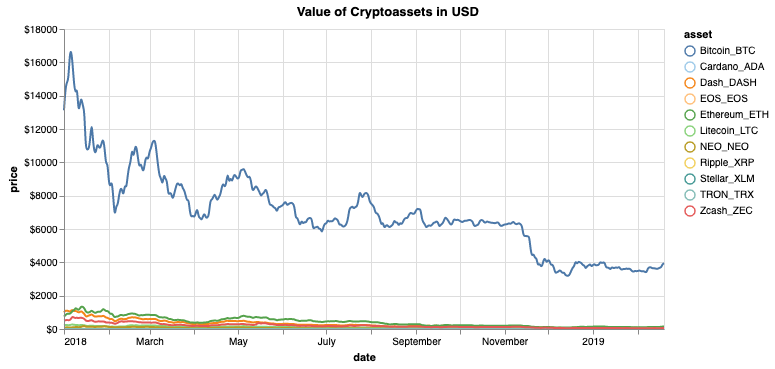

In [34]:
# dictionary of chart parameters
chart_params = {
    'df': multi_series_line_chart_data_all,
    'x': 'date',
    'y': 'price',
    'y_format_type': '$f',
    'y_scale_zero_bool': True,
    'chart_title': 'Value of Cryptoassets in USD',
    'color_scheme': 'tableau20',
    'width': 600,
    'height': 300
}
# generate chart
interactive_line_chart(chart_params)

##### 2.3 Simple Line Chart of Bitcoin Values from Market Data

In [35]:
# construct dataframe for visualization source data
bitcoin_market_data_price_close = multi_series_line_chart_data_all[multi_series_line_chart_data_all['asset'] == 'Bitcoin_BTC']

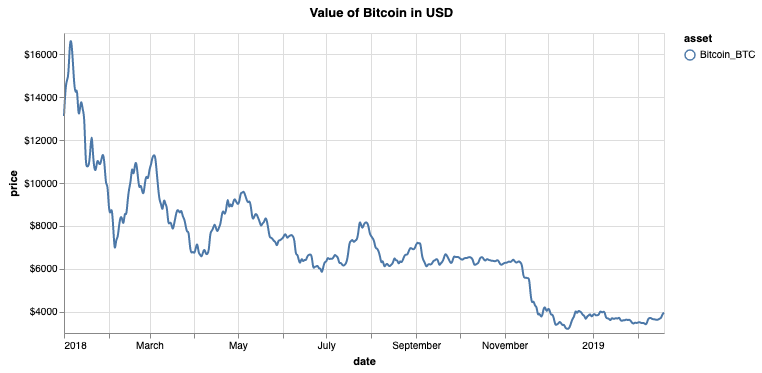

In [36]:
# dictionary of chart parameters
chart_params = {
    'df': bitcoin_market_data_price_close,
    'x': 'date',
    'y': 'price',
    'y_format_type': '$f',
    'y_scale_zero_bool': False,
    'chart_title': 'Value of Bitcoin in USD',
    'color_scheme': 'tableau20',
    'width': 600,
    'height': 300
}
# generate chart
interactive_line_chart(chart_params)

##### 2.4 Multi-Series Line Chart of Altcoin Values from Market Data

In [37]:
# construct dataframe for visualization source data
altcoin_market_data_price_close = multi_series_line_chart_data_all[multi_series_line_chart_data_all['asset'] != 'Bitcoin_BTC']

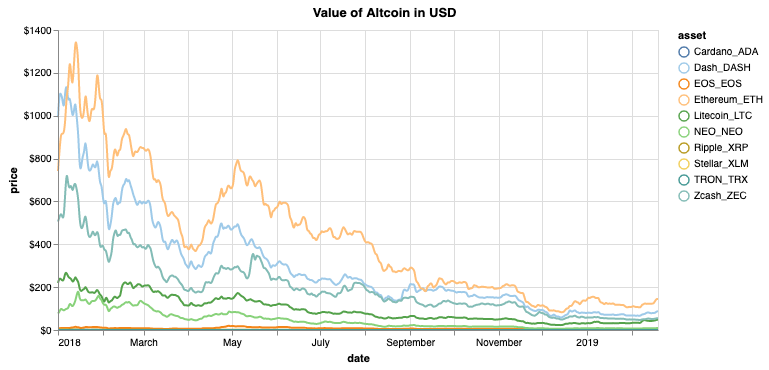

In [38]:
# dictionary of chart parameters
chart_params = {
    'df': altcoin_market_data_price_close,
    'x': 'date',
    'y': 'price',
    'y_format_type': '$f',
    'y_scale_zero_bool': False,
    'chart_title': 'Value of Altcoin in USD',
    'color_scheme': 'tableau20',
    'width': 600,
    'height': 300
}
# generate chart
interactive_line_chart(chart_params)

##### 2.5 Multi-Series Line Chart of Daily Price Change as Percentage

In [39]:
# construct dataframe for visualization source data
market_data_closing_price_growth_rate_visual = format_vis_data(market_data_closing_price_growth_rate, 'price_growth')

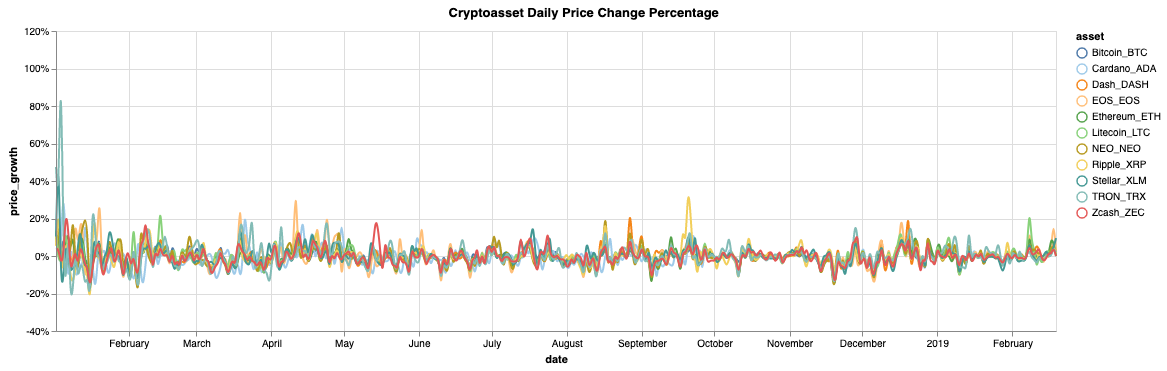

In [40]:
# dictionary of chart parameters
chart_params = {
    'df': market_data_closing_price_growth_rate_visual,
    'x': 'date',
    'y': 'price_growth',
    'y_format_type': '%',
    'y_scale_zero_bool': False,
    'chart_title': 'Cryptoasset Daily Price Change Percentage',
    'color_scheme': 'tableau20',
    'width': 1000,
    'height': 300
}
# generate chart
interactive_line_chart(chart_params)

##### 2.6 Multi-Series Line Chart of Asset Normalized Closing Prices

In [41]:
# construct dataframe for visualization source data
market_data_closing_price_normalized_visual = format_vis_data(market_data_closing_price_normalized, 'normalized_price')

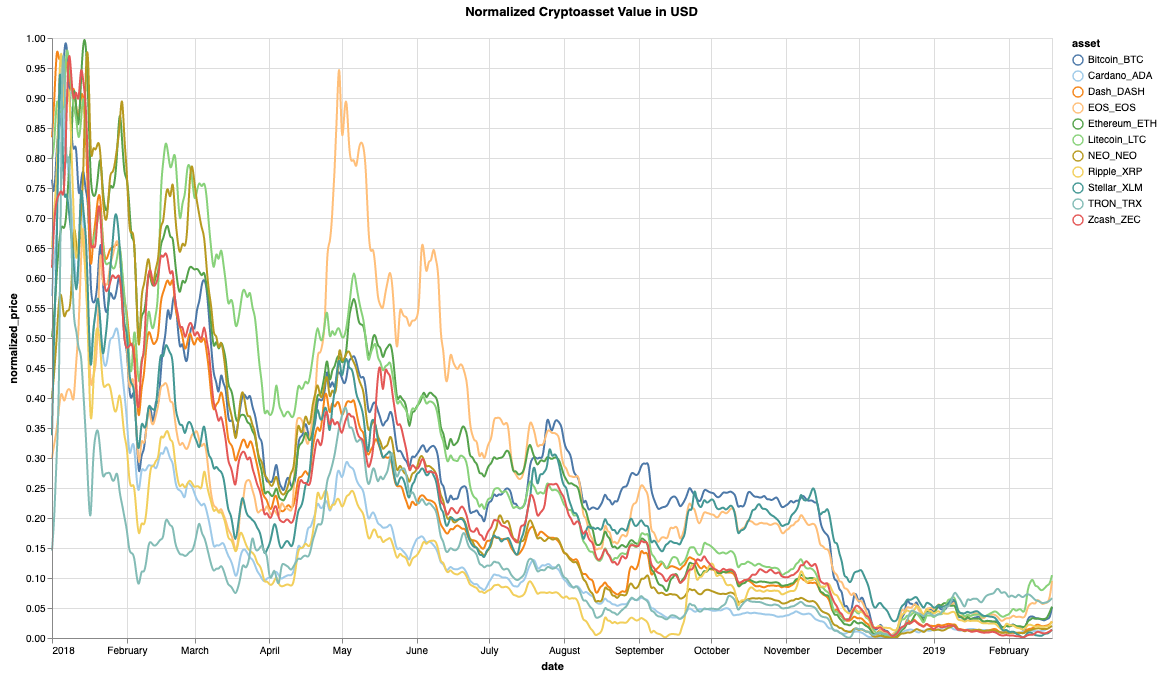

In [42]:
# dictionary of chart parameters
chart_params = {
    'df': market_data_closing_price_normalized_visual,
    'x': 'date',
    'y': 'normalized_price',
    'y_format_type': '',
    'y_scale_zero_bool': False,
    'chart_title': 'Normalized Cryptoasset Value in USD',
    'color_scheme': 'tableau20',
    'width': 1000,
    'height': 600
}
# generate chart
interactive_line_chart(chart_params)

#### 3. Predictive Modeling

##### 3.1 Define

Definition of **Moving Average** from Investopedia<sup>[2](#r2)</sup>:
<blockquote>"A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random short-term price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices."</blockquote>

##### 3.2 Formula

**Predictive Simple Moving Average**

The formula for simple moving average (SMA)<sup>[2](#r2)</sup>:

<div class='sma_formula'></div>

A modification of the moving average technique will use the latest set of values for each prediction and will be more useful in predicting values that are more than a day out. In other words, for each subsequent day, the predicted values for the previous days are taken into consideration as if they were directly observed, while removing the oldest observed or predicted value from the set of observations.

##### 3.3 Construct Functions

**Construct Function for Predictive Simple Moving Average Model**

In [43]:
def predictive_sma(p_sma_params):
    """
    This function will generate a dataframe of predicted asset values.
    
    Example argument dictionary:
    
    p_sma_params = {
    'date_series': df.date,
    'asset_series': df.asset,
    'training_year': '2018',
    'test_year': '2019'
    } 
    """
    moving_average_df = pd.DataFrame(columns=['date', 'asset'])
    moving_average_df['date'] = p_sma_params['date_series']
    moving_average_df['asset'] = p_sma_params['asset_series']
    moving_average_df.index = moving_average_df.date
    moving_average_df = moving_average_df.sort_index(ascending=True, axis=0)
    moving_average_df.index = range(0,len(moving_average_df))
    # splitting into train and test
    train = moving_average_df[moving_average_df.date.astype('str').str.contains(p_sma_params['training_year'], regex=False) == True]
    test = moving_average_df[moving_average_df.date.astype('str').str.contains(p_sma_params['test_year'], regex=False) == True]
    # make predictions
    preds = []
    for i in range(0,test.shape[0]):
        a = train['asset'][len(train)-test.shape[0]+i:].sum() + sum(preds)
        b = a/test.shape[0]
        preds.append(b)
    # calculate rmse
    rmse=np.sqrt(np.mean(np.power((np.array(test['asset'])-preds),2)))
    # generate dataframe of prediction values
    prediction = pd.DataFrame(columns=['date','price_close'])
    prediction.date = test.date
    prediction.price_close = preds
    return(rmse, prediction, train, test)

**Construct Function for Looping Through DataFrame**

In [44]:
def predictive_sma_loop(asset_price_time_series_dataframe, training_year, test_year):
    """
    Function takes in dataframe of time series pricing for set of assets. Returns two dataframes:
        1. rmse_df: DataFrame of Root Mean Square Error of predictions by asset.
        2. psa_predictions: DataFrame of Simple Moving Average predictions for asset by day.
    """
    rmse_df = pd.DataFrame(columns=['asset', 'rmse'])
    columns = asset_price_time_series_dataframe.columns
    sma_prediction = pd.DataFrame(columns=columns)
    sma_train = pd.DataFrame(columns=columns)
    sma_test = pd.DataFrame(columns=columns)
    i = 0
    for asset in asset_price_time_series_dataframe:
        if asset == 'date':
            pass
        else:
            p_sma_params = {
                'date_series': asset_price_time_series_dataframe.date,
                'asset_series': asset_price_time_series_dataframe[asset],
                'training_year': training_year,
                'test_year': test_year
                }
            rmse, prediction_df, train, test = predictive_sma(p_sma_params)
            sma_train[asset] = train.asset
            sma_test[asset] = test.asset
            while i == 0:
                sma_train['date'] = train.date
                sma_test['date'] = test.date
                sma_prediction['date'] = prediction_df.date
                i += 1
            sma_prediction[asset] = prediction_df.price_close
            rmse_dict = {
                'asset': asset,
                'rmse': rmse
            }
            rmse_df = rmse_df.append(rmse_dict, ignore_index=True)
    return(sma_prediction, sma_train, sma_test, rmse_df)

**Construct Function for Performance Measure Calculation**

In [45]:
def perf_measure(y_actual_df, y_hat_df):
    """
    Calculates number of true positive, false positive, true negative, and false negative model predictions
    by comparing y-actual and y-hat DataFrames.
    """
    perf_measure_df = pd.DataFrame(columns=['asset', 'true_positive', 'false_positive', 'true_negative', 'false_negative'])
    for asset in y_actual_df:
        TP = 0
        FP = 0
        TN = 0
        FN = 0

        for i in range(len(y_hat_df[asset])): 
            if y_actual_df[asset][i]==y_hat_df[asset][i]==1:
               TP += 1
            if y_hat_df[asset][i]==1 and y_actual_df[asset][i]!=y_hat_df[asset][i]:
               FP += 1
            if y_actual_df[asset][i]==y_hat_df[asset][i]==0:
               TN += 1
            if y_hat_df[asset][i]==0 and y_actual_df[asset][i]!=y_hat_df[asset][i]:
               FN += 1
        perf_measure_dict = {
            "asset": asset,
            "true_positive": TP,
            "false_positive": FP,
            "true_negative": TN,
            "false_negative": FN,
            }
        perf_measure_df = perf_measure_df.append(perf_measure_dict, ignore_index=True)
    return(perf_measure_df)

##### 3.4 Experiment

**Predictive Simple Average Modeling**

**_Declare Uniform Test Year and Training Year_**

In [46]:
test_year = '2019'
train_year = '2018'

**_Closing Price_**

In [47]:
# Run Data Through Model
psam_closing_price_prediction, psam_closing_price_training, psam_closing_price_test, psam_closing_price_rmse = predictive_sma_loop(market_data_closing_price, train_year, test_year)

In [48]:
# Preview Results
psam_closing_price_prediction.head()

,date,Bitcoin_BTC,Cardano_ADA,Dash_DASH,EOS_EOS,Ethereum_ETH,Litecoin_LTC,NEO_NEO,Ripple_XRP,Stellar_XLM,TRON_TRX,Zcash_ZEC
365,2019-01-01,4080.457993,0.041562,90.857604,2.943419,120.982423,31.436715,8.163446,0.377094,0.150242,0.016057,72.306456
366,2019-01-02,4036.497844,0.040890,89.454337,2.895072,119.241626,31.068438,8.013284,0.374330,0.147958,0.015933,71.118355
367,2019-01-03,3992.685569,0.040255,88.078204,2.849045,117.595465,30.723228,7.867704,0.371666,0.145825,0.015816,70.031844
368,2019-01-04,3960.646754,0.039754,86.916002,2.812010,116.399928,30.482004,7.752649,0.369522,0.144011,0.015739,69.181140
369,2019-01-05,3928.496473,0.039295,85.902727,2.774909,115.180476,30.229014,7.647742,0.367320,0.142118,0.015674,68.365233


In [49]:
# RMSE by Asset
psam_closing_price_rmse

,asset,rmse
0,Bitcoin_BTC,193.140224
1,Cardano_ADA,0.005825
2,Dash_DASH,8.594271
3,EOS_EOS,0.259157
4,Ethereum_ETH,18.840071
5,Litecoin_LTC,8.134245
6,NEO_NEO,0.742401
7,Ripple_XRP,0.037789
8,Stellar_XLM,0.035997
9,TRON_TRX,0.009132


In [50]:
# Generate Boolean Values of Predictive Price Movement (True = Postive Movement; False = Negative Movement)
psam_performance = psam_closing_price_training[-1:].append(psam_closing_price_prediction)
psam_performance_boolean = psam_performance.sort_index(ascending=True).drop(columns=['date']).pct_change() > 0
psam_performance_boolean['date'] = psam_performance.date
psam_performance_boolean = psam_performance_boolean.set_index('date')
psam_performance_boolean = psam_performance_boolean['2019-01-01':]
psam_performance_boolean_y_hat = psam_performance_boolean
psam_performance_boolean_y_hat.head()

,Bitcoin_BTC,Cardano_ADA,Dash_DASH,EOS_EOS,Ethereum_ETH,Litecoin_LTC,NEO_NEO,Ripple_XRP,Stellar_XLM,TRON_TRX,Zcash_ZEC
date,,,,,,,,,,,
2019-01-01,True,False,True,True,False,True,True,True,True,False,True
2019-01-02,False,False,False,False,False,False,False,False,False,False,False
2019-01-03,False,False,False,False,False,False,False,False,False,False,False
2019-01-04,False,False,False,False,False,False,False,False,False,False,False
2019-01-05,False,False,False,False,False,False,False,False,False,False,False


In [51]:
# Generate Boolean Values of Actual Price Movement (True = Postive Movement; False = Negative Movement)
market_data_closing_price_growth_rate_boolean_y_actual = market_data_closing_price_growth_rate_boolean.set_index('date')
market_data_closing_price_growth_rate_boolean_y_actual = market_data_closing_price_growth_rate_boolean_y_actual['2019-01-01':]
market_data_closing_price_growth_rate_boolean_y_actual.head()

,Bitcoin_BTC,Cardano_ADA,Dash_DASH,EOS_EOS,Ethereum_ETH,Litecoin_LTC,NEO_NEO,Ripple_XRP,Stellar_XLM,TRON_TRX,Zcash_ZEC
date,,,,,,,,,,,
2019-01-01,True,True,True,True,True,True,True,True,True,True,True
2019-01-02,True,True,True,True,True,True,True,True,True,True,False
2019-01-03,False,False,False,False,False,False,False,False,False,True,False
2019-01-04,True,True,False,True,True,True,False,False,True,True,False
2019-01-05,False,True,True,False,True,True,True,False,True,True,False


In [52]:
# Performance Measure based on Positive Movement
psam_performance_df = perf_measure(market_data_closing_price_growth_rate_boolean_y_actual, psam_performance_boolean_y_hat)
psam_performance_df

,asset,true_positive,false_positive,true_negative,false_negative
0,Bitcoin_BTC,10,9,14,17
1,Cardano_ADA,9,10,13,18
2,Dash_DASH,11,7,13,19
3,EOS_EOS,8,10,14,18
4,Ethereum_ETH,10,11,14,15
5,Litecoin_LTC,13,6,11,20
6,NEO_NEO,11,10,13,16
7,Ripple_XRP,7,11,17,15
8,Stellar_XLM,9,15,12,14
9,TRON_TRX,15,15,8,12


**_Normalized Closing Price_**

In [53]:
# Run Data Through Model
psam_closing_price_prediction_normalized, psam_closing_price_training_normalized, psam_closing_price_test_normalized, psam_closing_price_rmse_normalized = predictive_sma_loop(market_data_closing_price_normalized, train_year, test_year)

In [54]:
# Preview Results
psam_closing_price_prediction_normalized.head()

,date,Zcash_ZEC,Bitcoin_BTC,Cardano_ADA,Dash_DASH,EOS_EOS,TRON_TRX,Litecoin_LTC,NEO_NEO,Ripple_XRP,Stellar_XLM,Ethereum_ETH
365,2019-01-01,0.039557,0.069382,0.010859,0.031438,0.066071,0.020795,0.038999,0.016166,0.047259,0.100462,0.031664
366,2019-01-02,0.037958,0.066191,0.010356,0.030246,0.063572,0.020164,0.037497,0.015249,0.046285,0.097409,0.030305
367,2019-01-03,0.036182,0.063037,0.009943,0.028981,0.061058,0.019555,0.036048,0.014353,0.045190,0.094475,0.028929
368,2019-01-04,0.034643,0.059713,0.009545,0.027799,0.058737,0.019060,0.034744,0.013535,0.044210,0.091990,0.027631
369,2019-01-05,0.033475,0.057065,0.009180,0.026810,0.056875,0.018702,0.033792,0.012858,0.043423,0.089792,0.026685


In [55]:
# RMSE by Asset
psam_closing_price_rmse_normalized

,asset,rmse
0,Zcash_ZEC,0.017211
1,Bitcoin_BTC,0.016693
2,Cardano_ADA,NaN
3,Dash_DASH,0.008165
4,EOS_EOS,0.011795
5,TRON_TRX,0.044377
6,Litecoin_LTC,0.030935
7,NEO_NEO,0.004173
8,Ripple_XRP,0.014809
9,Stellar_XLM,0.047666


In [56]:
# Generate Boolean Values of Predictive Price Movement (True = Postive Movement; False = Negative Movement)
psam_performance_normalized = psam_closing_price_training_normalized[-1:].append(psam_closing_price_prediction_normalized)
psam_performance_boolean_normalized = psam_performance_normalized.sort_index(ascending=True).drop(columns=['date']).pct_change() > 0
psam_performance_boolean_normalized['date'] = psam_performance_normalized.date
psam_performance_boolean_normalized = psam_performance_boolean_normalized.set_index('date')
psam_performance_boolean_normalized = psam_performance_boolean_normalized['2019-01-01':]
psam_performance_boolean_y_hat_normalized = psam_performance_boolean_normalized
psam_performance_boolean_y_hat_normalized.head()

,Zcash_ZEC,Bitcoin_BTC,Cardano_ADA,Dash_DASH,EOS_EOS,TRON_TRX,Litecoin_LTC,NEO_NEO,Ripple_XRP,Stellar_XLM,Ethereum_ETH
date,,,,,,,,,,,
2019-01-01,True,True,False,True,True,False,True,True,True,True,False
2019-01-02,False,False,False,False,False,False,False,False,False,False,False
2019-01-03,False,False,False,False,False,False,False,False,False,False,False
2019-01-04,False,False,False,False,False,False,False,False,False,False,False
2019-01-05,False,False,False,False,False,False,False,False,False,False,False


In [57]:
# Generate Boolean Values of Actual Price Movement (True = Postive Movement; False = Negative Movement)
market_data_closing_price_growth_rate_boolean_y_actual = market_data_closing_price_growth_rate_boolean.set_index('date')
market_data_closing_price_growth_rate_boolean_y_actual = market_data_closing_price_growth_rate_boolean_y_actual['2019-01-01':]
market_data_closing_price_growth_rate_boolean_y_actual.head()

,Bitcoin_BTC,Cardano_ADA,Dash_DASH,EOS_EOS,Ethereum_ETH,Litecoin_LTC,NEO_NEO,Ripple_XRP,Stellar_XLM,TRON_TRX,Zcash_ZEC
date,,,,,,,,,,,
2019-01-01,True,True,True,True,True,True,True,True,True,True,True
2019-01-02,True,True,True,True,True,True,True,True,True,True,False
2019-01-03,False,False,False,False,False,False,False,False,False,True,False
2019-01-04,True,True,False,True,True,True,False,False,True,True,False
2019-01-05,False,True,True,False,True,True,True,False,True,True,False


In [58]:
# Performance Measure based on Positive Movement
psam_performance_df_normalized = perf_measure(market_data_closing_price_growth_rate_boolean_y_actual, psam_performance_boolean_y_hat_normalized)
psam_performance_df_normalized

,asset,true_positive,false_positive,true_negative,false_negative
0,Bitcoin_BTC,12,8,15,15
1,Cardano_ADA,8,11,12,19
2,Dash_DASH,12,7,13,18
3,EOS_EOS,9,10,14,17
4,Ethereum_ETH,9,11,14,16
5,Litecoin_LTC,10,7,10,23
6,NEO_NEO,13,8,15,14
7,Ripple_XRP,8,9,19,14
8,Stellar_XLM,10,15,12,13
9,TRON_TRX,15,16,7,12


## Results

### 1. Import Packages/Libraries

In [59]:
# import packages/libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 2. Root Mean Square Error(Normalized price_close)

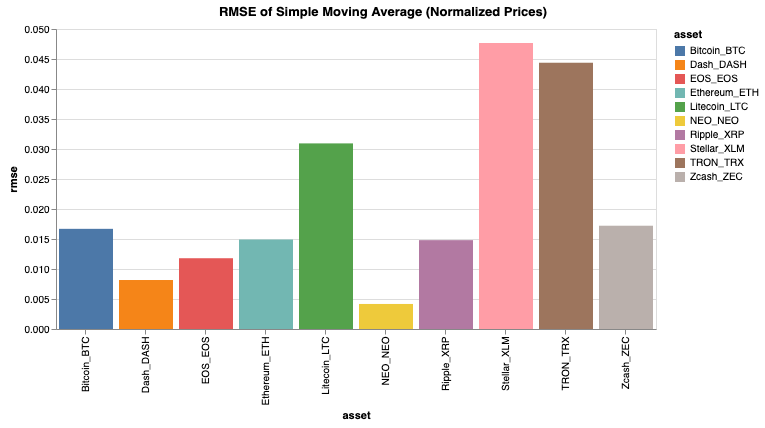

,asset,rmse
0,Zcash_ZEC,0.017211
1,Bitcoin_BTC,0.016693
2,Cardano_ADA,NaN
3,Dash_DASH,0.008165
4,EOS_EOS,0.011795
5,TRON_TRX,0.044377
6,Litecoin_LTC,0.030935
7,NEO_NEO,0.004173
8,Ripple_XRP,0.014809
9,Stellar_XLM,0.047666


In [60]:
# generate rmse chart
psam_closing_price_rmse_normalized_chart = alt.Chart(psam_closing_price_rmse_normalized).mark_bar().encode(
    x='asset',
    y='rmse',
    color='asset',
).properties(title='RMSE of Simple Moving Average (Normalized Prices)', width=600)
# return chart and dataframe
psam_closing_price_rmse_normalized_chart
psam_closing_price_rmse_normalized

### 3. Performance Measures(Normalized price_close)

#### 3.1 Generate Data

In [61]:
# construct performance measure by count dataframe
psam_performance_df_normalized = psam_performance_df_normalized.set_index('asset')

# construct performance measure by rate dataframe
psam_performance_rate_normalized = (psam_performance_df_normalized / 50)

#### 3.2 Generate Visualization

In [62]:
# construct dataframe of perfomance rate for visualization
psam_performance_rate_vis_normalized = pd.DataFrame(columns=['asset', 'performance_measure', 'rate'])
for performance_measure in psam_performance_rate_normalized:
    for i, asset in enumerate(psam_performance_rate_normalized.reset_index()['asset']):
        perf_meas_dict = {
            'asset': asset,
            'rate': psam_performance_rate_normalized[performance_measure][asset],
            'performance_measure': performance_measure
        }
        psam_performance_rate_vis_normalized = psam_performance_rate_vis_normalized.append(perf_meas_dict, ignore_index=True).sort_values('asset')

In [63]:
# generate performance measure chart
psam_performance_rate_vis_normalized_chart = alt.Chart(psam_performance_rate_vis_normalized).mark_bar().encode(
    x='performance_measure',
    y='rate',
    color='performance_measure',
    column='asset'
).properties(title='Performance Measures of Simple Moving Average', width=110)

#### 3.3 Display Visualization and Data

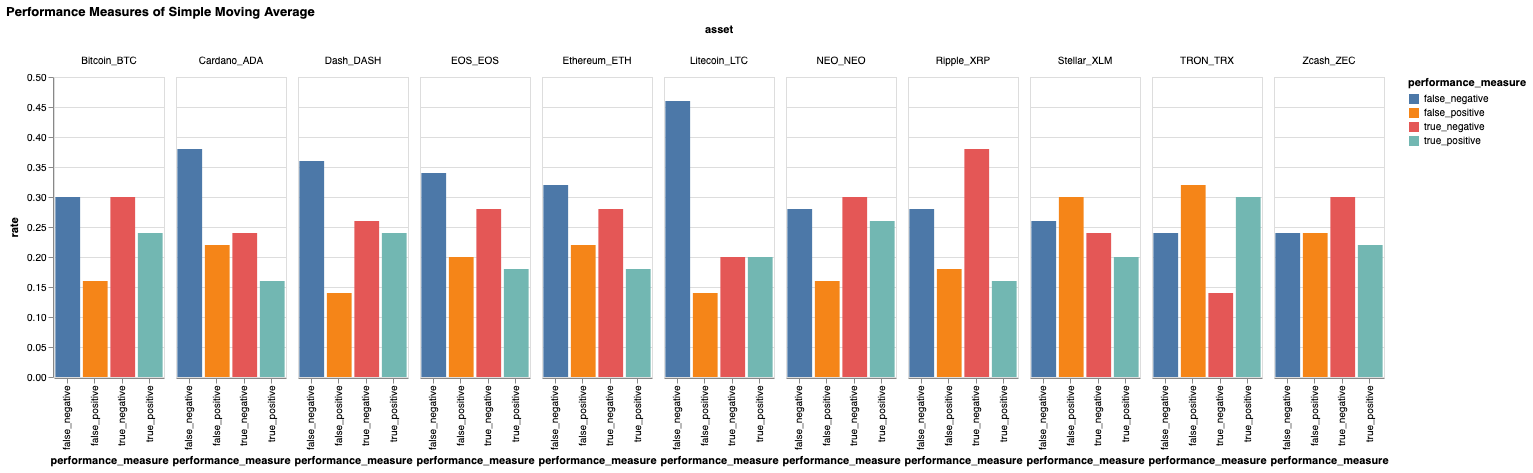

Perfomance Measure Count by Asset


,true_positive,false_positive,true_negative,false_negative
asset,,,,
Bitcoin_BTC,12,8,15,15
Cardano_ADA,8,11,12,19
Dash_DASH,12,7,13,18
EOS_EOS,9,10,14,17
Ethereum_ETH,9,11,14,16
Litecoin_LTC,10,7,10,23
NEO_NEO,13,8,15,14
Ripple_XRP,8,9,19,14
Stellar_XLM,10,15,12,13


Perfomance Measure Rate by Asset


,true_positive,false_positive,true_negative,false_negative
asset,,,,
Bitcoin_BTC,0.24,0.16,0.3,0.3
Cardano_ADA,0.16,0.22,0.24,0.38
Dash_DASH,0.24,0.14,0.26,0.36
EOS_EOS,0.18,0.2,0.28,0.34
Ethereum_ETH,0.18,0.22,0.28,0.32
Litecoin_LTC,0.2,0.14,0.2,0.46
NEO_NEO,0.26,0.16,0.3,0.28
Ripple_XRP,0.16,0.18,0.38,0.28
Stellar_XLM,0.2,0.3,0.24,0.26


In [64]:
# return visualization
psam_performance_rate_vis_normalized_chart
# return performance measure dataframes
print("Perfomance Measure Count by Asset")
psam_performance_df_normalized
print("Perfomance Measure Rate by Asset")
psam_performance_rate_normalized

#### 4. Simplified Performance Measures(Normalized price_close)

#### 4.1 Generate Data

In [65]:
# construct simplified perfomance measure dataframe
psam_performance_rate_agg_normalized = pd.DataFrame(columns=['correct', 'incorrect'])
psam_performance_rate_agg_normalized.correct = psam_performance_rate_normalized.true_positive + psam_performance_rate_normalized.true_negative
psam_performance_rate_agg_normalized.incorrect = psam_performance_rate_normalized.false_positive + psam_performance_rate_normalized.false_negative


#### 4.2 Generate Visualization

In [66]:
# construct visualization dataframe
psam_performance_rate_agg_vis_normalized = pd.DataFrame(columns=['asset', 'performance_measure', 'rate'])
for performance_measure in psam_performance_rate_agg_normalized:
    for i, asset in enumerate(psam_performance_rate_agg_normalized.reset_index()['asset']):
        perf_meas_dict = {
            'asset': asset,
            'rate': psam_performance_rate_agg_normalized[performance_measure][asset],
            'performance_measure': performance_measure
        }
        psam_performance_rate_agg_vis_normalized = psam_performance_rate_agg_vis_normalized.append(perf_meas_dict, ignore_index=True)

In [67]:
# generate visualization
psam_performance_rate_agg_vis_normalized_chart = alt.Chart(psam_performance_rate_agg_vis_normalized).mark_bar().encode(
    x='performance_measure',
    y='rate',
    color='performance_measure',
    column='asset'
).properties(width=110)

#### 4.4 Display Visualization and Data

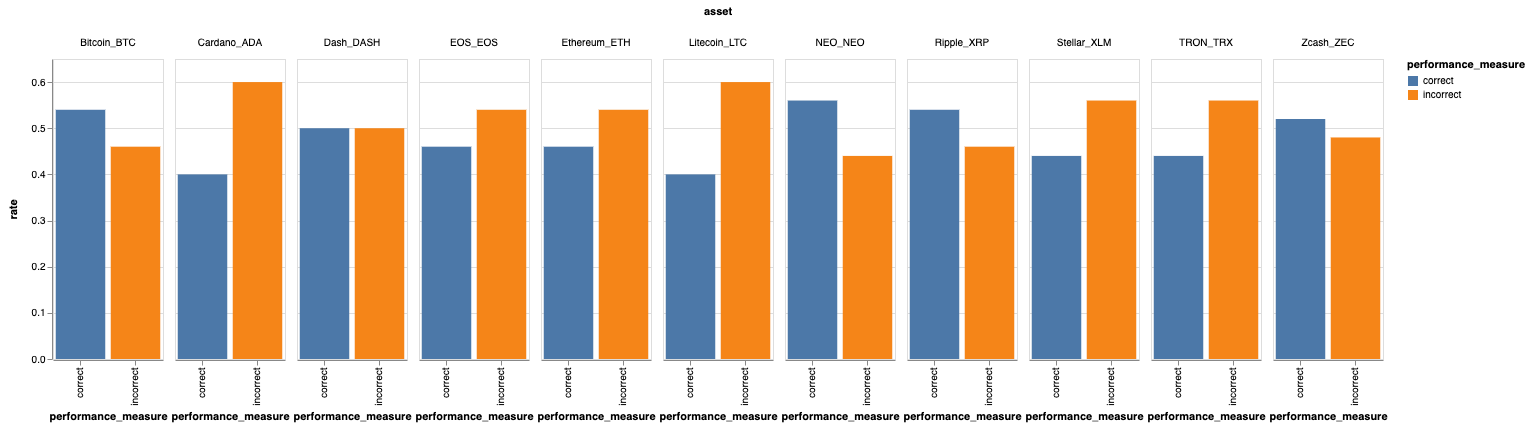

Simplified Performance Measure Rate


,correct,incorrect
asset,,
Bitcoin_BTC,0.54,0.46
Cardano_ADA,0.4,0.6
Dash_DASH,0.5,0.5
EOS_EOS,0.46,0.54
Ethereum_ETH,0.46,0.54
Litecoin_LTC,0.4,0.6
NEO_NEO,0.56,0.44
Ripple_XRP,0.54,0.46
Stellar_XLM,0.44,0.56


In [68]:
# return simplified performance measure visualization
psam_performance_rate_agg_vis_normalized_chart
# return simplified performance measure dataframe
print('Simplified Performance Measure Rate')
psam_performance_rate_agg_normalized

## Conclusion
The moving average provides a general estimate of the price movement for a given asset; however, it does not provide a reliable prediction as to whether the price is going to increase or decrease. So, while it may be good at providing a guess as to what the price will be, it does not provide actionable information. There may be better modeling techniques that could provide increased accuracy.

## References

<ol class="references">
    <li id="r1">Farell, R. (2015, May). An Analysis of the Cryptocurrency Industry. Retrieved March 20, 2019, from http://repository.upenn.edu/wharton_research_scholars/130</li>
    <li id="r2">Hayes, A. (2019, March 12). Moving Average - MA. Retrieved March 22, 2019, from https://www.investopedia.com/terms/m/movingaverage.asp</li>
</ol>